# <span style="color:green"> Numerical Simulation Laboratory (NSL)  1 </span>

## <span style="color:black"> Made by Alessandro Bertarelli </span>

### Exercise 01.1
- Test the random number generator by evaluating  $ \int_0^1 r dr = \frac{1}{2} $

In [1]:
import scipy.stats as scp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

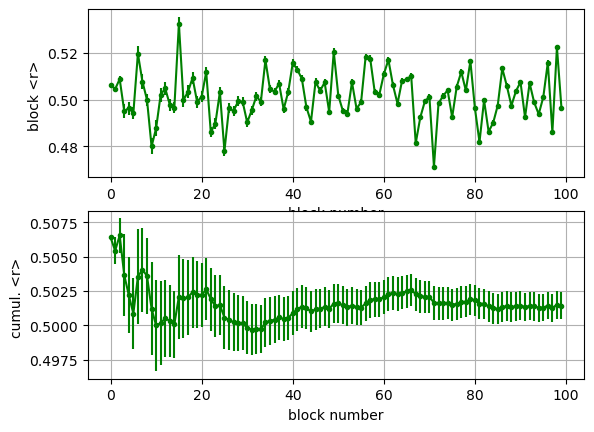

In [2]:
# first we get the number of lines in the results file, it is not the only way possible
# we could also have written 'for line in file' in the following for loop

mydata = open("myresults.txt", "r")
j = 0
length = len(mydata.readlines())

mydata.close()

# the readline() method returns the line as a string, since each line contains 4 numbers we use the split() method
# to separate each line into a list of 4 elements and then we convert them to float to plot them.

averages = []
errors = []
j = []

mydata = open("myresults.txt", "r")
for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    j.append(i)
    averages.append(float(datalist[0]))
    errors.append(float(datalist[1]))
    
plt.subplot(2,1,1)
plt.errorbar(j, averages, errors, xerr = None, fmt = ".-g")    
plt.xlabel('block number')
plt.ylabel('block <r> ')
plt.grid(True)


mydata.close()  

averages = []
errors = []
j = []

mydata = open("myresults.txt", "r")
for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    j.append(i)
    averages.append(float(datalist[2]))
    errors.append(float(datalist[1]))
    
plt.subplot(2,1,2)
plt.errorbar(j, averages, errors, xerr = None, fmt = ".-g")    
plt.xlabel('block number')
plt.ylabel('cumul. <r> ')
plt.grid(True)
    


plt.show()

  

- In the first plot we show that each block's average is independent and thus can be closer or farther away from the true value than any other
block's average

- In the second plot we show that the cumulative average converges as expected and the error gets smaller

### Exercise 01.1 part 2 

- Plot the estimated block variance $ \sigma^2 = \int_0^1 (r- 0.5)^2 dr = \frac{1}{12} = 0.08333...$
- and relative uncertainty 

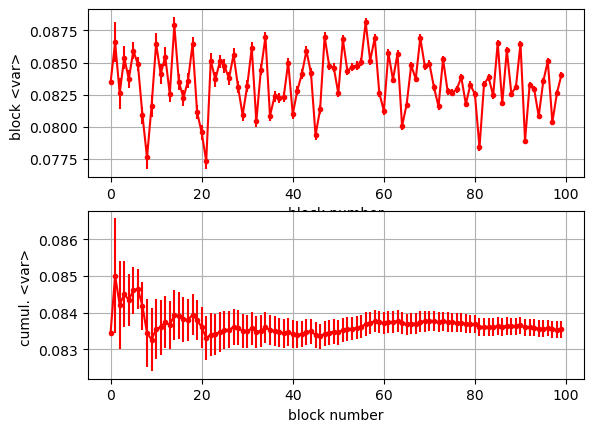

In [3]:
#same code as the previous part 

averages = []
errors = []
j = []

mydata = open("myresults.txt", "r")
for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    j.append(i)
    averages.append(float(datalist[3]))
    errors.append(float(datalist[5]))
    
plt.subplot(2,1,1)
plt.errorbar(j, averages, errors, xerr = None, fmt = ".-r")    
plt.xlabel('block number')
plt.ylabel('block <var> ')
plt.grid(True)


mydata.close()  

averages = []
errors = []
j = []

mydata = open("myresults.txt", "r")
for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    j.append(i)
    averages.append(float(datalist[4]))
    errors.append(float(datalist[5]))
    
plt.subplot(2,1,2)
plt.errorbar(j, averages, errors, xerr = None, fmt = ".-r")    
plt.xlabel('block number')
plt.ylabel('cumul. <var> ')
plt.grid(True)
    


plt.show()

- In the first plot we show that each block's variance is independent

- In the second plot we show that the cumulative variance converges as expected and the error gets smaller

To prove that the generated numbers can be considered "random" we plot the chi2 distribution obtained by comparing the amount of times
that 10000 generated numbers between 0 and 1 fall in each of the 100 subdivisions of the interval, for each subdivision, 10000 times over to get 10000 $ \chi^2 $ values

(In total this took 10000* 100 *10000 = $ 10^{10} $ generated numbers so it took a while to calculate but nevertheless the result is a lovely chi2 distribution plot )

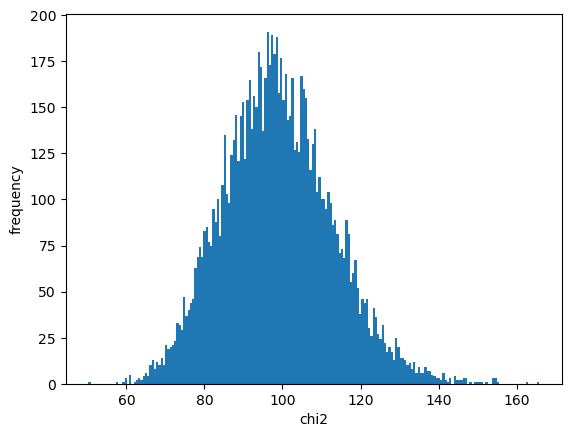

In [4]:


mydata = open("chi2.txt", "r")
mychi2array = []
nbins = 200
length = len(mydata.readlines())

mydata.close()

mydata = open("chi2.txt" , "r")

for i in range (length):
    datastring = mydata.readline()
    datalist = datastring.split()
    mychi2 = datalist[0]
    mychi2array.append(float(mychi2))

plt.hist(mychi2array, nbins)

plt.xlabel('chi2')
plt.ylabel('frequency')

mydata.close()

To be compared with the following analytically defined as $f(x, k = 99) = \frac{x^{99/2-1} e^{\frac{-x}{2}}}{2^{99/2}\Gamma(99/2)} $

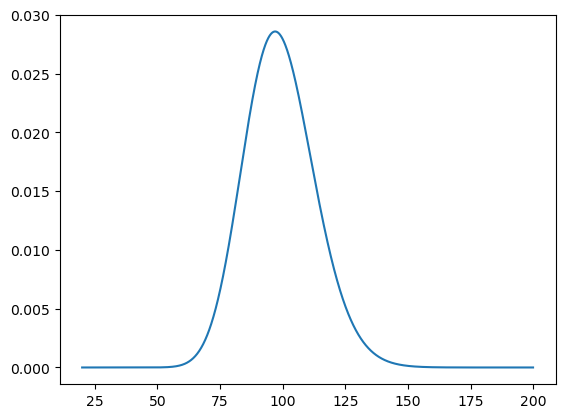

In [5]:
def f(x):
    return x ** ((99/2)-1) * math.exp((-x/2))/(2**(99/2)*math.gamma(99/2))

asc = np.arange(20, 200, 0.1)

y = np.vectorize(f)

plt.plot(asc, y(asc))
plt.show()

- One can observe perfect accordance

### Exercise 01.2
- We sample two additionals distributions: the exponential and Cauchy-Lorentz using the inverse of the cumulative method
- We then make a plot of the averages of throws with 1) a standard (uniform), 2) the exponential and 3) the C.-L. distribution
- Note: for the exponential $\lambda = 1 $ and for the lorentzian $\mu = 0 $ and $ \Gamma = 1 $

##### Thus one can evaluate the inverse functions to be
  $ f^{-1}(x) = -ln(x)$ for the exponential and
  
  $ f^{-1}(x) = \sqrt{\frac{1}{\pi x}-1}, x \in [0, \frac{1}{\pi}] $ for the C.-L.

- Note: For each distribution we obtain 10000 averages for N = 1, 2, 10, 100 

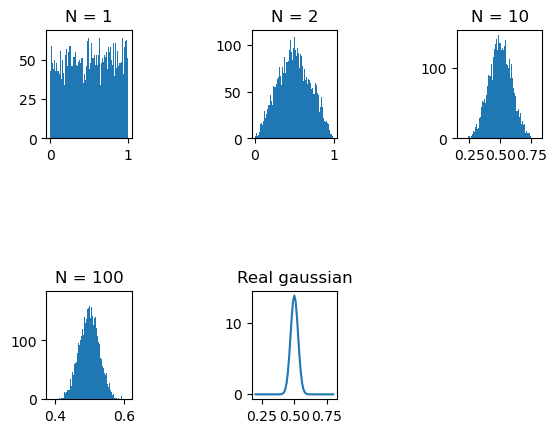

In [6]:
mydata = open("distroresults_unif.txt", "r")

my_unif_array = []
nbins = 200
# N =1
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[0]))


plt.subplot(3,5,1)
plt.title("N = 1")

plt.hist(my_unif_array, nbins)

mydata.close()
# N = 2
mydata = open("distroresults_unif.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[1]))
    
   
plt.subplot(3,5,3)
plt.title("N = 2") 
plt.hist(my_unif_array, nbins)

mydata.close()
# N = 10
mydata = open("distroresults_unif.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[2]))


plt.subplot(3,5,5)
plt.title("N = 10")
plt.hist(my_unif_array, nbins)

mydata.close()
# N = 100
mydata = open("distroresults_unif.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[3]))


plt.subplot(3,5,11)
plt.title("N = 100")
plt.hist(my_unif_array, nbins)

mydata.close()

(mu, sigma) = scp.norm.fit(my_unif_array)

asc = np.arange(0.2, 0.8, 0.01)


plt.subplot(3,5,13)
plt.title("Real gaussian")
plt.plot(asc, scp.norm.pdf(asc, mu, sigma))

plt.show()

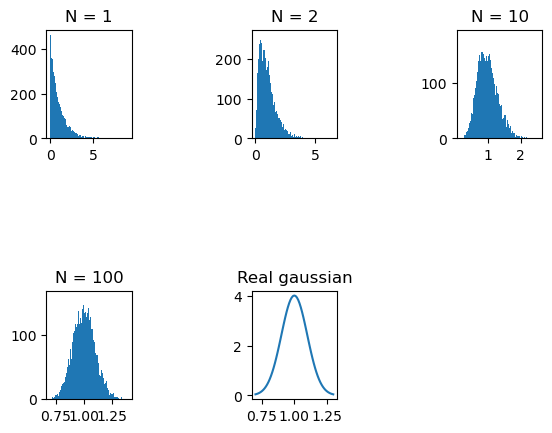

In [7]:
mydata = open("distroresults_expo.txt", "r")

my_unif_array = []
nbins = 200
# N =1
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[0]))
    
plt.subplot(3,5,1)
plt.title("N = 1")
plt.hist(my_unif_array, nbins)

mydata.close()
# N = 2
mydata = open("distroresults_expo.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[1]))
    
plt.subplot(3,5,3)
plt.title("N = 2")
plt.hist(my_unif_array, nbins)

mydata.close()
# N = 10
mydata = open("distroresults_expo.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[2]))
    
plt.subplot(3,5,5)
plt.title("N = 10")
plt.hist(my_unif_array, nbins)

mydata.close()
# N = 100
mydata = open("distroresults_expo.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[3]))
    
plt.subplot(3,5,11)
plt.title("N = 100")
plt.hist(my_unif_array, nbins)

mydata.close()
(mu, sigma) = scp.norm.fit(my_unif_array)

asc = np.arange(0.7, 1.3, 0.01)

plt.subplot(3,5,13)
plt.title("Real gaussian")
plt.plot(asc, scp.norm.pdf(asc, mu, sigma))


plt.show()

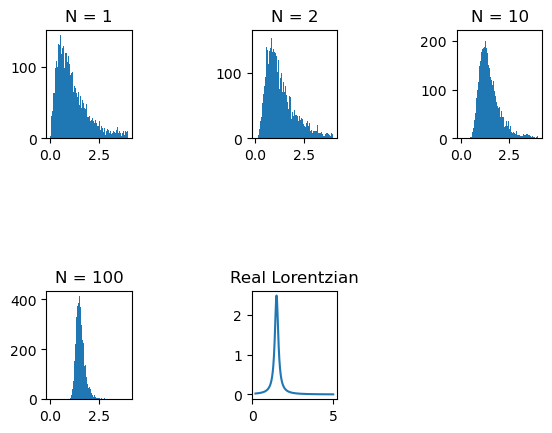

In [8]:
mydata = open("distroresults_lorentz.txt", "r")

my_unif_array = []
nbins = 200
# N =1
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[0]))
    
plt.subplot(3,5,1)
plt.title("N = 1")
plt.hist(my_unif_array, nbins, range = [0, 4])

mydata.close()
# N = 2
mydata = open("distroresults_lorentz.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[1]))
    
plt.subplot(3,5,3)
plt.title("N = 2")
plt.hist(my_unif_array, nbins, range = [0, 4])

mydata.close()
# N = 10
mydata = open("distroresults_lorentz.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[2]))
    
plt.subplot(3,5,5)
plt.title("N = 10")
plt.hist(my_unif_array, nbins, range = [0, 4])

mydata.close()
# N = 100
mydata = open("distroresults_lorentz.txt", "r")

my_unif_array = []
for i in range (10000):
    datastring = mydata.readline()
    datalist = datastring.split()
    my_unif_array.append(float(datalist[3]))
    
plt.subplot(3,5,11)
plt.title("N = 100")
plt.hist(my_unif_array, nbins, range = [0, 4])

mydata.close()
(mu, gamma) = scp.cauchy.fit(my_unif_array)

asc = np.arange(0.2, 5, 0.01)

plt.subplot(3,5,13)
plt.title("Real Lorentzian")
plt.plot(asc, scp.cauchy.pdf(asc, mu, gamma))


plt.show()

- We can clearly see how the uniform and exponential distributions converge to the normal (gaussian) whereas the Cauchy-Lorentz converges
 to a Cauchy-Lorentz distribution

### Exercise 01.3

- We want to simulate Buffon's experiment (https://en.wikipedia.org/wiki/Buffon%27s_needle_problem) to find an estimate of $ \pi $

  We had 100 blocks of 100 evaluations each, with each evaluation requiring 10000 throws. The block average method was used to calculate the uncertainties for every average value found in each block

- To simulate the experiment we "create" a virtual table of arbitrary length (100 units), and then 50 dividing equally spaced lines

- To simulate each throw of the unitary-length-needle, we generate a random number that determines where the lower corner of the needle lands along the table, then we need to generate the angle. To do this we generate two more random uniform numbers x and y in the right-hand-side unit circle and compute the arctangent from the origin to the point.

- From these we compute where the upper corner of the needle ends as $x_{upper} = x_{lower}+l*cos\theta$

- Thus we can determine whether or not a line has been crossed by the needle.

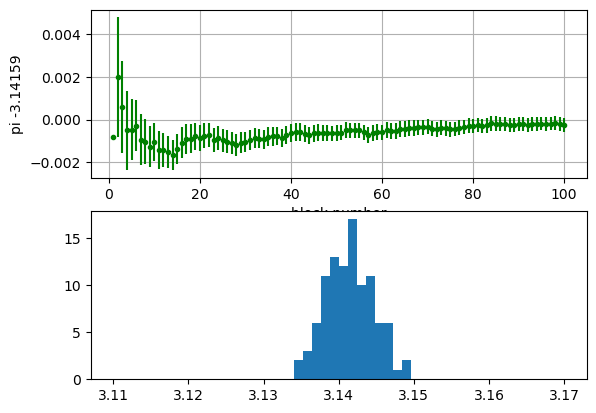

In [11]:
mydata = open("mypi's.txt", "r")

j = 0
for i in range (100):
    datastring = mydata.readline()
    datalist = datastring.split()
    j = j + 1
    av = float(datalist[1])
    y_err = float(datalist[2])
    plt.subplot(2,1,1)
    plt.errorbar(j, av-3.14159, y_err, xerr = None, fmt = ".-g")
    
plt.xlabel('block number')
plt.ylabel('pi -3.14159')
plt.grid(True)

mydata.close()  

mydata = open("mypi's.txt", "r")

pi_array = []
nbins = 50
for i in range (100):
    datastring = mydata.readline()
    datalist = datastring.split()
    pi_array.append(float(datalist[0]))
    
plt.subplot(2,1,2)
plt.hist(pi_array, nbins, range = [3.11, 3.17])

plt.show()

mydata.close()